### Study of Screen Time and Its Impact on Sleep Quality

This analysis will be cover three main sections:

#### 1. ***Data Characterization and Data Preparation***
   - An initial analysis of the structure and size of the dataset, assessing the existence of missing values and data types of the features/variables in the dataset. 
   - This section will focus on understanding the scope and nature of the data, providing context for the analysis.
   - After data characterization, the dataset will be cleaned and any missing data points addressed.

#### 2. ***Statistical Analysis***
   - Data visualizations will be created to illustrate statistical relationships between variables, examining the distributions of various features, their correlations, and other patterns within the dataset. 

#### 3. ***Inference***
   - I will test the normality of the dataset and then perform some inference if possible. 

# 1. Data Characterization and Data Preparation

In [3]:
#Importing libraries
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Importing the dataset 
df_sleep = pd.read_csv('screen time_sleep quality survey results.csv')

In [5]:
#Viewing the head of the dataset
df_sleep.head()

,Participant ID,Daily Screen Time (hrs),Evening Screen Time (hrs),Sleep Duration (hrs),Sleep Quality Score (1-10),Uses Blue Light Filter?,Feels Rested Upon Waking?,Screens in Bedroom?,Daily Caffeine Intake (cups),Exercise Frequency (days/week),Age (years)
0,1,4.5,2.6,6.8,5,Yes,No,Yes,1,2,22
1,2,5.9,3.1,6.5,5,No,No,Yes,1.5,4,23
2,3,2.0,1.1,8.2,8,Yes,Yes,No,0.9,3,35
3,4,5.4,2.9,6.2,6,No,No,Yes,2,1,27
4,5,6.9,3.4,5.5,4,No,No,Yes,2.5,2,19


In [6]:
#Viewing the tail of the dataset
df_sleep.tail()

,Participant ID,Daily Screen Time (hrs),Evening Screen Time (hrs),Sleep Duration (hrs),Sleep Quality Score (1-10),Uses Blue Light Filter?,Feels Rested Upon Waking?,Screens in Bedroom?,Daily Caffeine Intake (cups),Exercise Frequency (days/week),Age (years)
31,32,6.7,3.4,5.5,4,No,No,Yes,2.4,1,20
32,33,6.1,2.8,6.0,5,Yes,No,Yes,1.8,4,29
33,34,4.5,2.5,6.9,6,Yes,Yes,No,0.9,3,28
34,35,5.0,2.7,6.3,6,Yes,Yes,No,2,2,34
35,36,5.0,2.2,6.5,6,Yes,Yes,No,1.3,4,27


In [7]:
#View the shape of the dataset
df_sleep.shape

(36, 11)

*a) After having a first exploration of the dataset, we can see that it has 36 observations and 11 variables*

In [9]:
df_sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Participant ID                  36 non-null     int64  
 1   Daily Screen Time (hrs)         36 non-null     float64
 2   Evening Screen Time (hrs)       36 non-null     float64
 3   Sleep Duration (hrs)            36 non-null     float64
 4   Sleep Quality Score (1-10)      36 non-null     int64  
 5   Uses Blue Light Filter?         36 non-null     object 
 6   Feels Rested Upon Waking?       36 non-null     object 
 7   Screens in Bedroom?             36 non-null     object 
 8   Daily Caffeine Intake (cups)    36 non-null     object 
 9   Exercise Frequency (days/week)  36 non-null     object 
 10  Age (years)                     36 non-null     int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 3.2+ KB


In [10]:
df_sleep.describe()

,Participant ID,Daily Screen Time (hrs),Evening Screen Time (hrs),Sleep Duration (hrs),Sleep Quality Score (1-10),Age (years)
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,18.500000,4.841667,2.533333,6.613889,5.944444,30.222222
std,10.535654,1.574325,0.856571,1.037071,1.787967,12.078579
min,1.000000,2.000000,1.000000,5.200000,3.000000,18.000000
25%,9.750000,3.575000,1.900000,5.850000,5.000000,22.750000
50%,18.500000,5.000000,2.700000,6.400000,6.000000,28.000000
75%,27.250000,5.950000,3.200000,7.250000,7.000000,34.250000
max,36.000000,7.200000,3.900000,9.000000,10.000000,74.000000


*b) The describe function shows only numeric values, thus indicating that Daily Caffeine Intake (cups) and Exercise Frequency (days/week) variables' data types have not been categorized correctly*

In [12]:
#Checking Daily Caffeine Intake (cups) variable
df_sleep['Daily Caffeine Intake (cups)'].unique

<bound method Series.unique of 0            1
1          1.5
2          0.9
3            2
4          2.5
5          0.5
6            3
7          1.5
8            2
9            1
10         2.5
11           2
12         0.7
13           1
14         1.6
15           3
16         1.9
17         0.6
18           1
19    2.5 cups
20         0.6
21           1
22         1.7
23         2.1
24         1.2
25         2.2
26           1
27       1 cup
28         1.1
29         1.5
30         0.7
31         2.4
32         1.8
33         0.9
34           2
35         1.3
Name: Daily Caffeine Intake (cups), dtype: object>

In [13]:
#Checking Exercise Frequency (days/week) variable
df_sleep['Exercise Frequency (days/week)'].unique

<bound method Series.unique of 0           2
1           4
2           3
3           1
4           2
5           5
6           1
7     4 times
8           2
9           3
10          2
11          4
12          3
13          2
14          3
15          1
16          2
17          4
18          3
19          2
20          5
21          3
22          2
23          1
24          4
25          2
26          3
27          2
28          3
29          2
30          5
31          1
32          4
33          3
34          2
35          4
Name: Exercise Frequency (days/week), dtype: object>

*c) Daily Caffeine Intake (cups) and Exercise Frequency (days/week) variables will have to be cleaned before conducting statistical analysis. Also, I will check if the dataset has any missing values*

In [15]:
#Checking for null values
df_sleep.isnull().sum()

Participant ID                    0
Daily Screen Time (hrs)           0
Evening Screen Time (hrs)         0
Sleep Duration (hrs)              0
Sleep Quality Score (1-10)        0
Uses Blue Light Filter?           0
Feels Rested Upon Waking?         0
Screens in Bedroom?               0
Daily Caffeine Intake (cups)      0
Exercise Frequency (days/week)    0
Age (years)                       0
dtype: int64

*c) Cleaning Daily Caffeine Intake (cups) and Exercise Frequency (days/week) variables and converting them to INT*

In [17]:
df_sleep['Exercise Frequency (days/week)'] = df_sleep['Exercise Frequency (days/week)'].replace(r'\D+', '', regex=True)

In [18]:
df_sleep['Exercise Frequency (days/week)'] = df_sleep['Exercise Frequency (days/week)'].astype(int)

In [19]:
#Checking if Exercise Frequency (days/week) variable is now cleaned
df_sleep['Exercise Frequency (days/week)'].unique

<bound method Series.unique of 0     2
1     4
2     3
3     1
4     2
5     5
6     1
7     4
8     2
9     3
10    2
11    4
12    3
13    2
14    3
15    1
16    2
17    4
18    3
19    2
20    5
21    3
22    2
23    1
24    4
25    2
26    3
27    2
28    3
29    2
30    5
31    1
32    4
33    3
34    2
35    4
Name: Exercise Frequency (days/week), dtype: int32>

In [20]:
df_sleep['Daily Caffeine Intake (cups)'] = df_sleep['Daily Caffeine Intake (cups)'].replace(r'\D+', '', regex=True)

In [21]:
df_sleep['Daily Caffeine Intake (cups)'] = df_sleep['Daily Caffeine Intake (cups)'].astype(int)

In [22]:
#Exploring the cleaned dataset
df_sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Participant ID                  36 non-null     int64  
 1   Daily Screen Time (hrs)         36 non-null     float64
 2   Evening Screen Time (hrs)       36 non-null     float64
 3   Sleep Duration (hrs)            36 non-null     float64
 4   Sleep Quality Score (1-10)      36 non-null     int64  
 5   Uses Blue Light Filter?         36 non-null     object 
 6   Feels Rested Upon Waking?       36 non-null     object 
 7   Screens in Bedroom?             36 non-null     object 
 8   Daily Caffeine Intake (cups)    36 non-null     int32  
 9   Exercise Frequency (days/week)  36 non-null     int32  
 10  Age (years)                     36 non-null     int64  
dtypes: float64(3), int32(2), int64(3), object(3)
memory usage: 2.9+ KB


# 2. Statistical Analysis

In [24]:
df_sleep.describe()

,Participant ID,Daily Screen Time (hrs),Evening Screen Time (hrs),Sleep Duration (hrs),Sleep Quality Score (1-10),Daily Caffeine Intake (cups),Exercise Frequency (days/week),Age (years)
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,18.500000,4.841667,2.533333,6.613889,5.944444,10.083333,2.750000,30.222222
std,10.535654,1.574325,0.856571,1.037071,1.787967,8.371294,1.180194,12.078579
min,1.000000,2.000000,1.000000,5.200000,3.000000,1.000000,1.000000,18.000000
25%,9.750000,3.575000,1.900000,5.850000,5.000000,2.000000,2.000000,22.750000
50%,18.500000,5.000000,2.700000,6.400000,6.000000,8.000000,3.000000,28.000000
75%,27.250000,5.950000,3.200000,7.250000,7.000000,16.250000,4.000000,34.250000
max,36.000000,7.200000,3.900000,9.000000,10.000000,25.000000,5.000000,74.000000


I can see that the **main variable Sleep Quality Score (1-10) seems to be slightly left or negatively skewed since median (6.000000) is a littble bit higher than the mean (5.944444)**. The same happens with Daily Screen Time (hrs), Evening Screen Time (hrs), Exercise Frequency (days/week) and Age variables, while Sleep Duration (hrs) seems to be positively skewed since the mean (6.613889) is higher than the median (6.400000)

We will be able to get more inisghts from data visualization

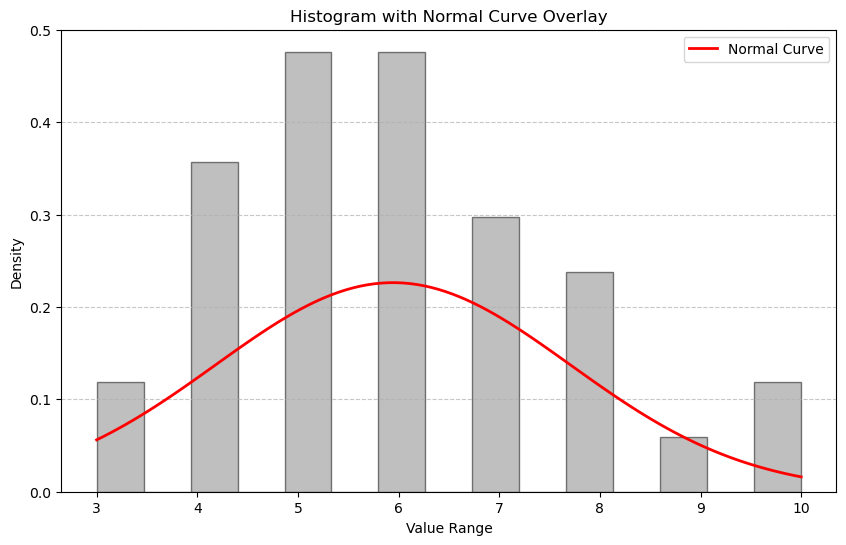

In [26]:
# Histogram  
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(df_sleep['Sleep Quality Score (1-10)'], bins=15, density=True, color='grey', edgecolor='black', alpha=0.5)

# First we calculate the normal distribution parameters 
mu, std = stats.norm.fit(df_sleep['Sleep Quality Score (1-10)'])

# Then, we create a range of x values for the normal curve
x = np.linspace(min(df_sleep['Sleep Quality Score (1-10)']), max(df_sleep['Sleep Quality Score (1-10)']), 100)

# Also, create the normal distribution curve
p = stats.norm.pdf(x, mu, std)

# Plot the normal curve
plt.plot(x, p, 'r-', linewidth=2, label='Normal Curve')
plt.xlabel('Value Range')
plt.ylabel('Density')
plt.title('Histogram with Normal Curve Overlay')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

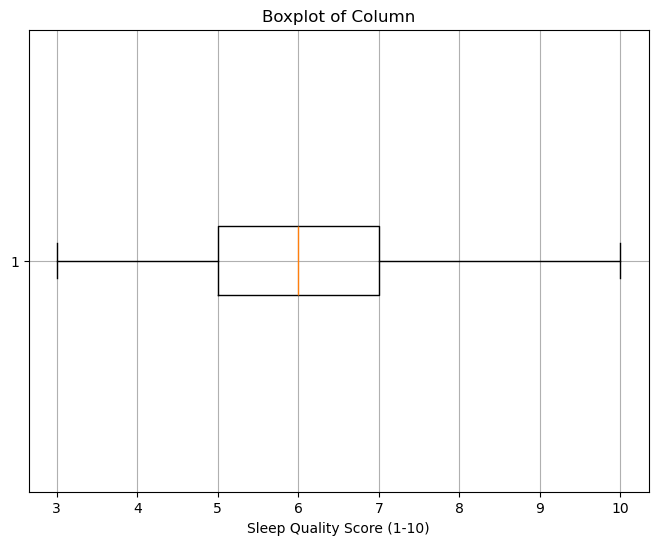

In [27]:
# Plotting the boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df_sleep['Sleep Quality Score (1-10)'],vert=False)
plt.title('Boxplot of Column')
plt.xlabel('Sleep Quality Score (1-10)')
plt.grid(True)
plt.show()

***As can be seen in the boxplot, Sleep Quality Score (1-10) variable appears to have a slight left skew, supported by both the mean being slightly less than the median and the asymmetry observed in the whiskers of the boxplot.***

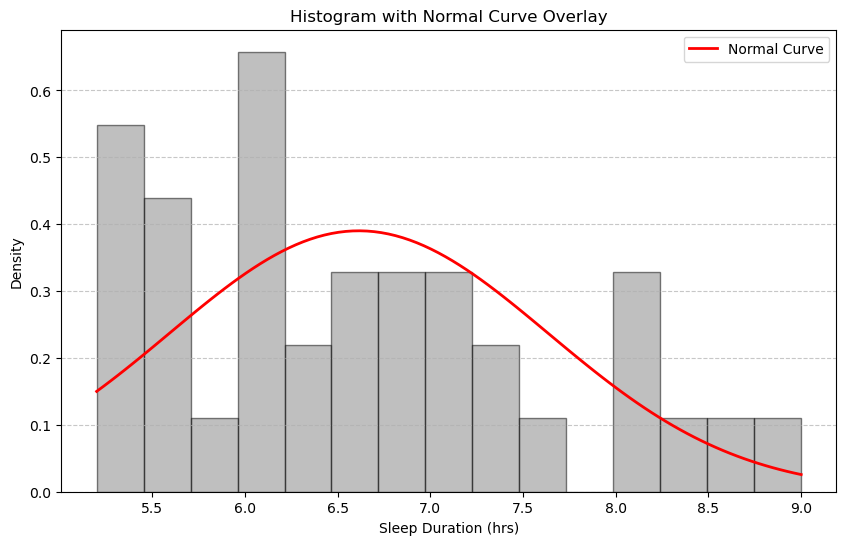

In [29]:
# Histogram
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(df_sleep['Sleep Duration (hrs)'], bins=15, density=True, color='grey', edgecolor='black', alpha=0.5)

# First we calculate the normal distribution parameters  
mu, std = stats.norm.fit(df_sleep['Sleep Duration (hrs)'])

# Then, we create a range of x values for the normal curve
x = np.linspace(min(df_sleep['Sleep Duration (hrs)']), max(df_sleep['Sleep Duration (hrs)']), 100)

# Also, create the normal distribution curve
p = stats.norm.pdf(x, mu, std)

# Plot the normal curve
plt.plot(x, p, 'r-', linewidth=2, label='Normal Curve')
plt.xlabel('Sleep Duration (hrs)')
plt.ylabel('Density')
plt.title('Histogram with Normal Curve Overlay')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

***As can be seen in the histogram above, Sleep Duration variable appears to have a slight right skew***

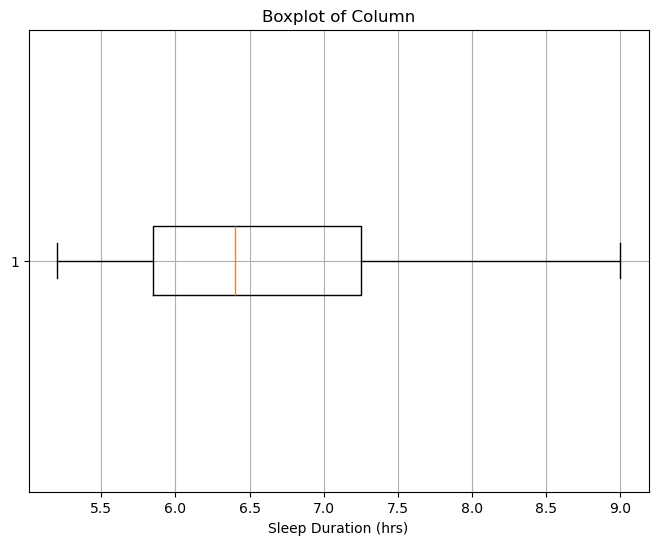

In [31]:
# Plotting the boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df_sleep['Sleep Duration (hrs)'],vert=False)
plt.title('Boxplot of Column')
plt.xlabel('Sleep Duration (hrs)')
plt.grid(True)
plt.show()

***As can be seen in the boxplot, Sleep Duration variable appears to be slightly right-skewed, supported by both the mean being slightly greater than the median and the longer right whisker in the boxplot***

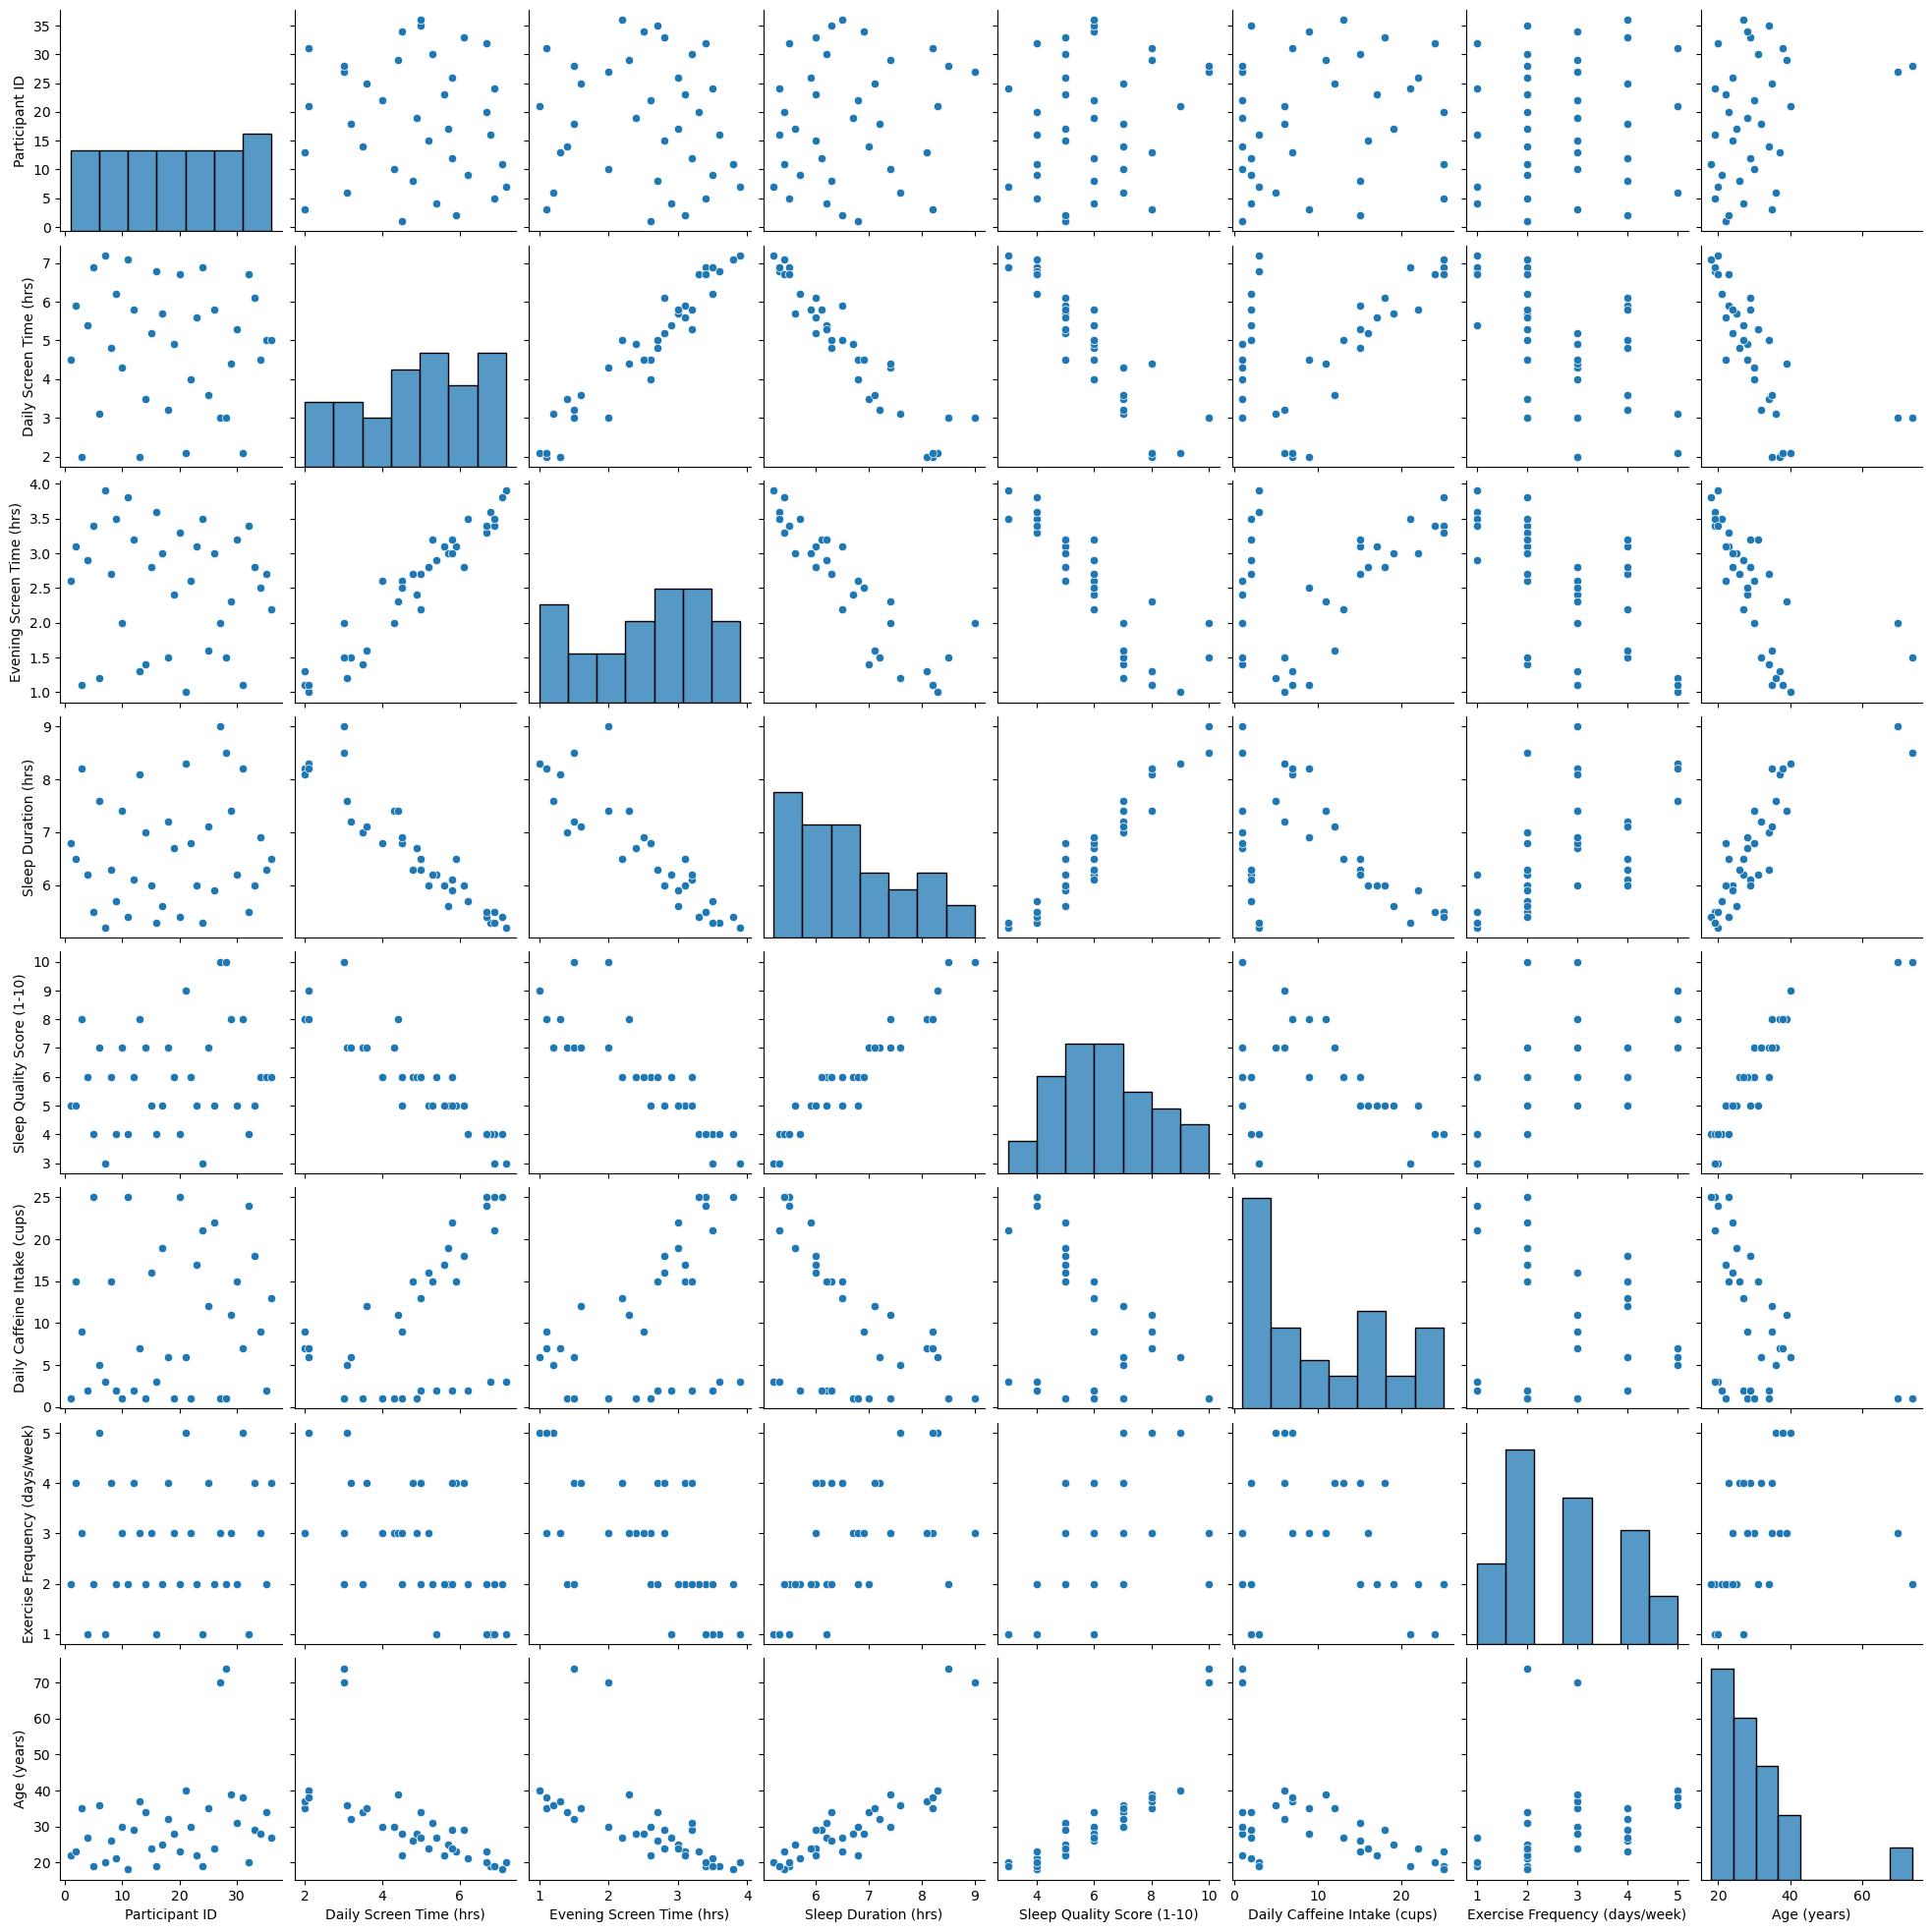

In [33]:
sns.pairplot(df_sleep)

From the provided pairplot, we can observe:
-*Positive Correlations* between ***Daily Screen Time and Evening Screen Time***. Also, between ***Sleep Quality Score and Sleep Duration.***
-*Negative Correlations* between ***Sleep Duration and Daily Screen Time & Evening Screen Time.*** Also, we can observe not a perfectly negative correlation but still a visible negative correlation between ***Daily Screen Time and Sleep Quality Score.***


**Analysis of categorical values**

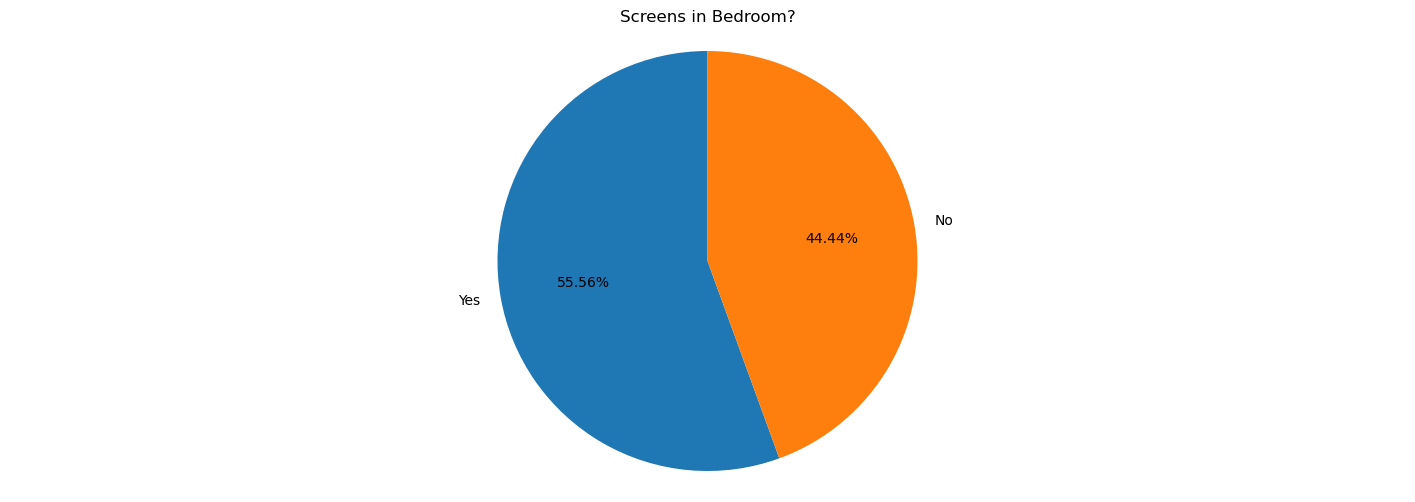

In [36]:
#Count frequencies
category_counts = df_sleep['Screens in Bedroom?'].value_counts()

#Plotting the pie chart

plt.figure(figsize=(18,6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.2f%%',startangle=90)
plt.title('Screens in Bedroom?')
plt.axis('equal')
plt.show()

***More than half of respondents (55,56%) have screens in their bedroom***

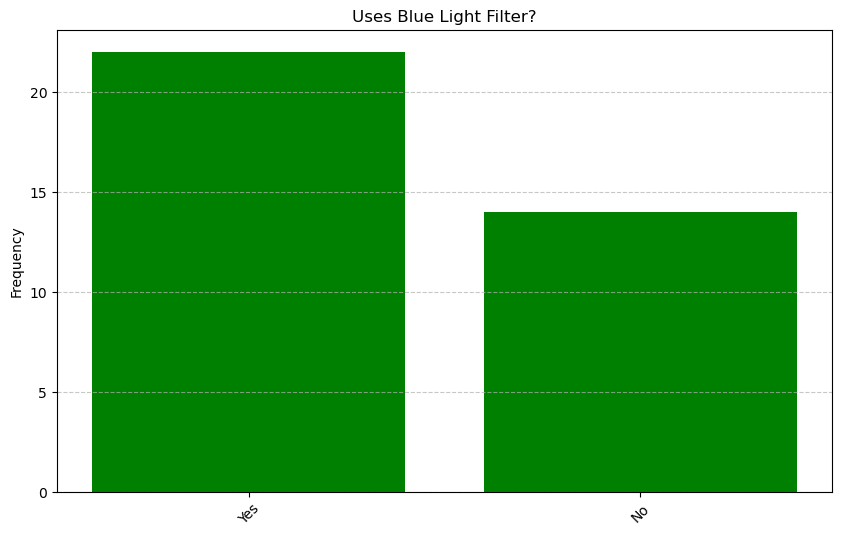

In [38]:
#Count frequencies
category_counts = df_sleep['Uses Blue Light Filter?'].value_counts()

#Vertical bar chart
plt.figure(figsize=(10,6))
plt.bar(category_counts.index, category_counts.values, color='green')
plt.ylabel('Frequency')
plt.title('Uses Blue Light Filter?')
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.xticks(rotation=45)
plt.show()

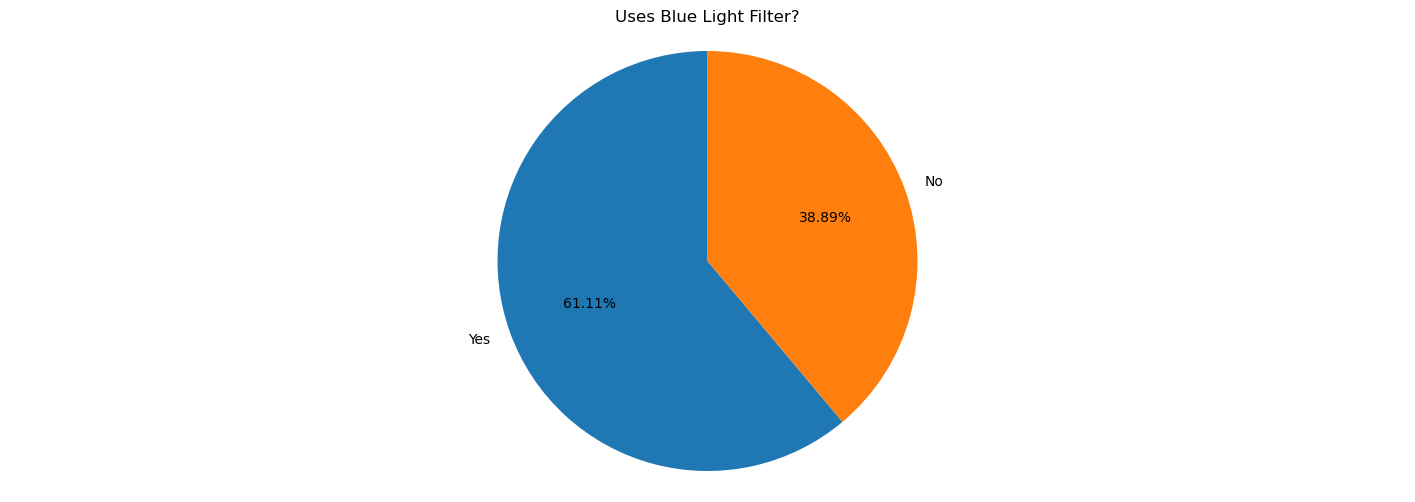

In [39]:
#Count frequencies
category_counts = df_sleep['Uses Blue Light Filter?'].value_counts()

#Plotting the pie chart

plt.figure(figsize=(18,6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.2f%%',startangle=90)
plt.title('Uses Blue Light Filter?')
plt.axis('equal')
plt.show()

***More than 60% of respondents (61,11%) use blue light filter***

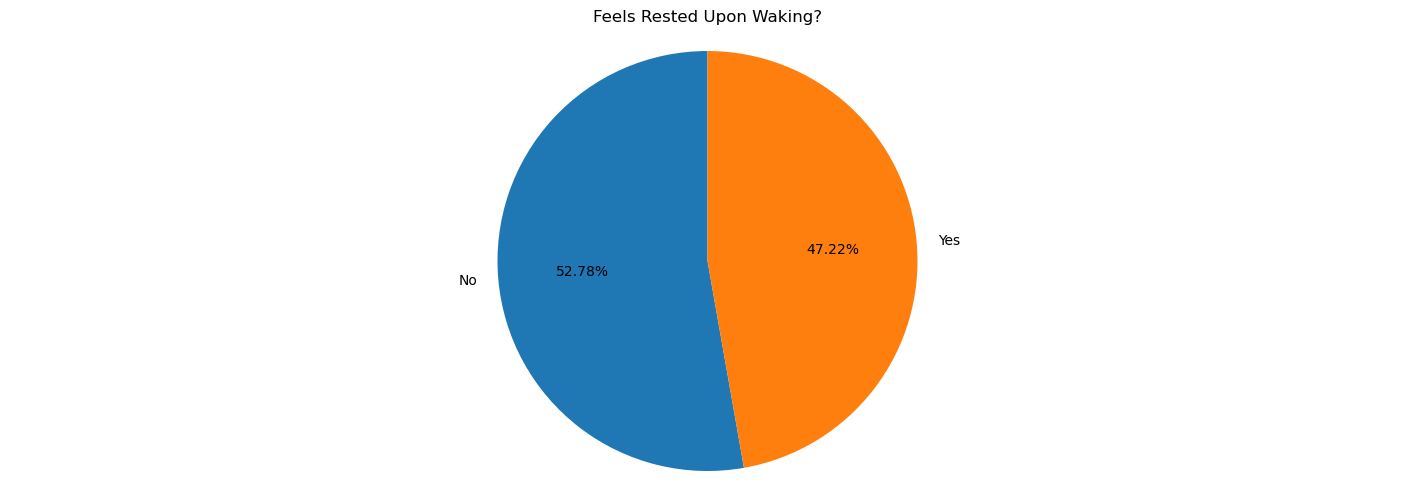

In [41]:
#Count frequencies
category_counts = df_sleep['Feels Rested Upon Waking?'].value_counts()

#Plotting the pie chart

plt.figure(figsize=(18,6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.2f%%',startangle=90)
plt.title('Feels Rested Upon Waking?')
plt.axis('equal')
plt.show()

***More than half of respondents (52,78%) feel rested upon walking***

Now let's ***test the normality of the cleaned dataset using Shapiro Test***

In [44]:
# Shapiro-Wilk Test
stat, p_value = stats.shapiro(df_sleep['Sleep Quality Score (1-10)'])
print(f'Statistic: {stat}, p-value: {p_value}')

Statistic: 0.945643502190443, p-value: 0.07627340447433141


In [45]:
if p_value >= 0.05:
    print("Sample appears to be normally distributed.")
else:
    print("Sample does not appear to be normally distributed.")

Sample appears to be normally distributed.


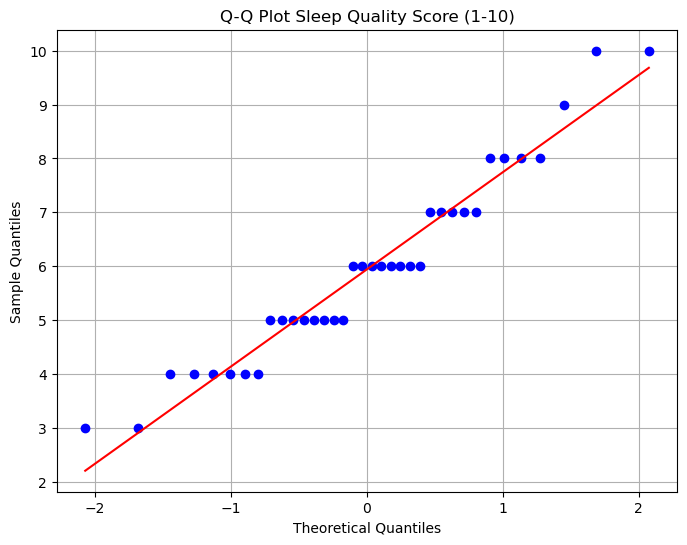

In [46]:
## Q-Q (quantile-quantile) plot
# Step 2: Creating Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(df_sleep['Sleep Quality Score (1-10)'], dist="norm", plot=plt)

# Step 3: Adding titles and labels
plt.title('Q-Q Plot Sleep Quality Score (1-10)')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

# Step 4: Showing the plot
plt.grid()
plt.show()

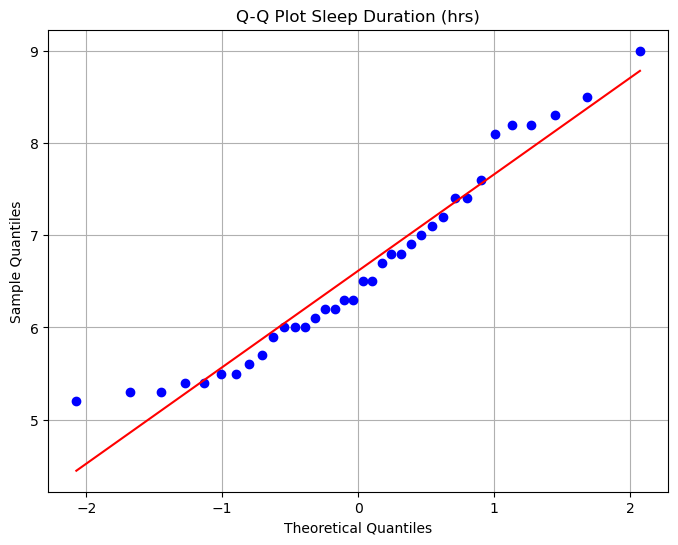

In [47]:
## Q-Q (quantile-quantile) plot
# Step 2: Creating Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(df_sleep['Sleep Duration (hrs)'], dist="norm", plot=plt)

# Step 3: Adding titles and labels
plt.title('Q-Q Plot Sleep Duration (hrs)')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

# Step 4: Showing the plot
plt.grid()
plt.show()

# 3. Inference

In [49]:
# Filtering the DataFrame for entries with a high Daily Screen Time (hrs) > 5
high_screen_time_df = df_sleep[df_sleep['Daily Screen Time (hrs)'] > 5]

# Calculating the probability within this filtered group
mean_sleep_quality = high_screen_time_df['Sleep Quality Score (1-10)'].mean()
std_sleep_quality = high_screen_time_df['Sleep Quality Score (1-10)'].std()

# Probability of having someone who ranks their sleep quality with a score <= 4 in the high screen time group
prob = norm.cdf(4, mean_sleep_quality, std_sleep_quality)

print(prob)

0.27245479389612537


In [50]:
1-prob

0.7275452061038746

The probability of low Sleep Quality Score (below 4) is that about 27.25% of people with high screen time are expected to have a sleep quality score of 4 or below. Conversely, the probability of higher Sleep Quality Score (above 4) is that about 72.75% of people with high screen time are expected to have a sleep quality score above 4.
This result suggests that, while a portion of people with high screen time may experience low sleep quality (around 27%), the majority still report a sleep quality score higher than 4.

